# Setup

In [25]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot
import plotly.express as px

In [3]:
import plotly
print(plotly.__version__)

5.10.0


In [108]:
categories = ['Environment', 'Social', 'Governance']

subcategories_env_pos = ['Climate Impact', 'Biodiversity and Environmental Footprint', 'Waste and Emission Management', 'Environmental Opportunities ','Waste and Emissions Management ']
subcategories_env_neg = ['Greenwashing','Environmental Crime', 'Biodiversity and Environmental Footprint','Climate Impact','Waste and Emission Management','Waste and Emissions Management ']
subcategories_env = subcategories_env_pos + subcategories_env_neg
subcategories_env = list(dict.fromkeys(subcategories_env))

subcategories_soc_pos = ['Human Capital ','Workplace and Product Safety','Cybersecurity','Diversity and Inclusion','Public Relations','Community Opportunities']
subcategories_soc_neg = ['Human Capital ','Workplace and Product Safety','Cybersecurity','Discrimination','Controversial Profile']
subcategories_soc = subcategories_soc_pos + subcategories_soc_neg
subcategories_soc = list(dict.fromkeys(subcategories_soc))

subcategories_gov_pos_neg = ['Business Ethics and Transparency','Board Engagement','Legal Compliance','Product Stewardship']

subcategories = ['Climate Impact', 'Biodiversity and Environmental Footprint', 'Waste and Emission Management', 'Human Capital ', 'Environmental Opportunities ', 'Waste and Emissions Management ', 'Diversity and Inclusion', 'Workplace and Product Safety', 'Environmental Crime', 'Legal Compliance', 'Business Ethics and Transparency', 'Product Stewardship']

# Get data

In [24]:
all_data = pd.read_csv('../Data/posts_esg_final.csv')
print(len(all_data))
all_data['urn'] = all_data['urn'].astype('int64') 

all_data.head()

172


Unnamed: 0                  urn                ts company  numLikes  \
0          16  6984440000000000000  08/10/2022 09:01  boeing       280   
1          30  6982130000000000000  02/10/2022 00:00  boeing       498   
2          51  6978020000000000000  20/09/2022 16:04  boeing      4938   
3          61  6973260000000000000  07/09/2022 12:59  boeing      5121   
4          73  6969440000000000000  27/08/2022 23:49  boeing       346   

   numComments                                               text  \
0            6  Global cooperation is a beautiful thing 🌎.\r\n...   
1            5  October marks #EnergyAwarenessMonth across the...   
2           77  We predict a windy forecast at #ASC22. 💨\r\n\r...   
3           61  Today marks the 25th anniversary of the F-22 R...   
4            5  #TeamBoeing engineer Kristine Ramos spoke to t...   

   Environment  Positive  Climate Impact  ...  Human Capital   \
0        120.0     120.0           120.0  ...             NaN   
1         10.0      10.0             NaN  ...             NaN   
2         30.0       NaN             NaN  ...             NaN   
3         15.0       NaN             NaN  ...             NaN   
4          5.0       5.0             NaN  ...             NaN   

   Environmental Opportunities   Waste and Emission Management  \
0                           NaN                            NaN   
1                           NaN                            NaN   
2                           NaN                            NaN   
3                           NaN                            NaN   
4                           NaN                            NaN   

   Diversity and Inclusion  Workplace and Product Safety  Environmental Crime  \
0                      NaN                           NaN                  NaN   
1                      NaN                           NaN                  NaN   
2                      NaN                           NaN                  NaN   
3                      NaN                           NaN                  NaN   
4                      NaN                           NaN                  NaN   

   Governance  Legal Compliance  Business Ethics and Transparency  \
0         NaN               NaN                               NaN   
1         NaN               NaN                               NaN   
2         NaN               NaN                               NaN   
3         NaN               NaN                               NaN   
4         NaN               NaN                               NaN   

   Product Stewardship  
0                  NaN  
1                  NaN  
2                  NaN  
3                  NaN  
4                  NaN  

[5 rows x 24 columns]

In [106]:
all_data.columns

Index(['Unnamed: 0', 'urn', 'ts', 'company', 'numLikes', 'numComments', 'text',
       'Environment', 'Positive', 'Climate Impact',
       'Biodiversity and Environmental Footprint', 'Negative',
       'Waste and Emissions Management ', 'Social', 'Human Capital ',
       'Environmental Opportunities ', 'Waste and Emission Management',
       'Diversity and Inclusion', 'Workplace and Product Safety',
       'Environmental Crime', 'Governance', 'Legal Compliance',
       'Business Ethics and Transparency', 'Product Stewardship'],
      dtype='object')

In [6]:
all_data['company'].unique()

array(['boeing', 'jpmorgan', 'merck', 'albertsons', 'jcpenney', 'metlife',
       'pepsico', 'wellsfargo', 'oracle', 'xerox', 'exelon', 'gap',
       'antheminc', 'textron', 'unionpacific', 'staples', 'humana',
       'aramark', 'avaya', 'saicinc', 'nordstrom', 'jabil', 'amgen',
       'amd', 'steelcase', 'kiewit', 'petsmart', 'unilever', 'ecolab',
       'tellabs', 'cunamutualgroup', 'flowserve', 'kennametal',
       'novglobal', 'bankofhawaii', 'earthlink'], dtype=object)

# Overall post analysis

In [7]:
option = 'unilever'

In [257]:
data = all_data.loc[all_data['company'] == option].copy()
data = data.reset_index()

num_esg_pos = data['Positive'].value_counts(dropna=True).sum()
num_esg_neg = data['Negative'].value_counts(dropna=True).sum()

cat_counts = dict()
cat_scores = dict()

data['Environmental subcategories'] = 0 
data['Social subcategories'] = 0 
data['Governance subcategories'] = 0 


score_env=0
score_soc=0
score_gov=0

for index, col in enumerate(data):
    if index < (len(data)-1):
        if pd.isna(data.at[index, col]):
            continue 
        else:
            if col in subcategories_env:
                score_env += data.at[index, col] 
            elif col in subcategories_soc:
                score_soc += data.at[index, col]
            elif col in subcategories_gov_pos_neg:
                score_gov += data.at[index, col]
            
            data.at[index, 'Environmental subcategories'] = score_env
            data.at[index, 'Social subcategories'] = score_soc
            data.at[index,'Governance subcategories'] = score_gov
    else: 
        break

for col in categories:
    cat_counts[col] = data[col].value_counts(dropna=True).sum()
    score = data[col].dropna().mean()
    if pd.isna(score):
        score = 0
    cat_scores[col] = score

cat_counts_df = pd.DataFrame({'Category': list(cat_counts.keys()), 'Counts': list(cat_counts.values())})
cat_scores_df = pd.DataFrame({'Category': list(cat_scores.keys()), 'Scores Sum': list(cat_scores.values())})

cat_scores_df = pd.DataFrame({'Category': list(cat_scores.keys()), 'Scores Sum': list(cat_scores.values())})
cat_scores_df = pd.DataFrame({'Category': list(cat_scores.keys()), 'Scores Sum': list(cat_scores.values())})


subcat_counts = dict()
subcat_scores = dict()
subcat_cat = []

for col in subcategories:
    subcat_counts[col] = data[col].value_counts(dropna=True).sum()
    score = data[col].dropna().mean()
    if pd.isna(score):
        score = 0
    subcat_scores[col] = score

for col in subcat_counts:
    if col in subcategories_env:
        subcat_cat.append('Environmental')
    elif col in subcategories_soc:
        subcat_cat.append('Social')
    elif col in subcategories_gov_pos_neg:
        subcat_cat.append('Governance')  
        
cat_individual_scores = dict()

# data['Environmental category']= data[subcategories_env].sum(axis=1)
# data['Social category']= data[subcategories_soc].sum(axis=1)
# data['Governance category']= data[subcategories_gov_pos_neg].sum(axis=1)

data['ESG total score'] = data[categories].sum(axis=1)

subcat_counts_df = pd.DataFrame({'Category': list(subcat_counts.keys()), 'Counts': list(subcat_counts.values()), 'Main category': subcat_cat})
subcat_scores_df = pd.DataFrame({'Category': list(subcat_scores.keys()), 'Scores Sum': list(subcat_scores.values()),'Main category': subcat_cat})

subcat_counts_df = subcat_counts_df.sort_values(by='Main category')
subcat_scores_df = subcat_scores_df.sort_values(by='Main category')

avg_likes = data['numLikes'].mean()
avg_comments = data['numComments'].mean()


def extract_hashtags(text):
    hashtag_list = []
     
    # splitting the text into words
    for word in text.split():
        if word[0] == '#':
            hashtag_list.append(word[1:])
    return hashtag_list

In [258]:
print(avg_likes, avg_comments)

400.94117647058823 15.058823529411764


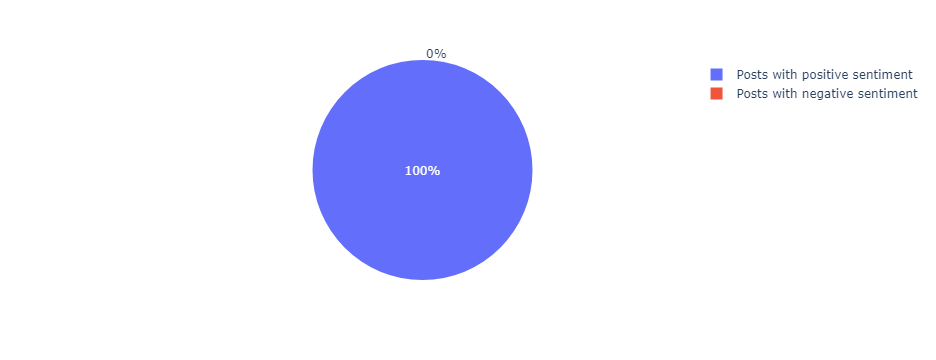

In [259]:
labels = ['Posts with positive sentiment', 'Posts with negative sentiment']
sizes = [num_esg_pos, num_esg_neg]
explode = (0, 0) 

fig = px.pie(values=sizes, names=labels)
fig.show()

<AxesSubplot:xlabel='Category', ylabel='Counts'>

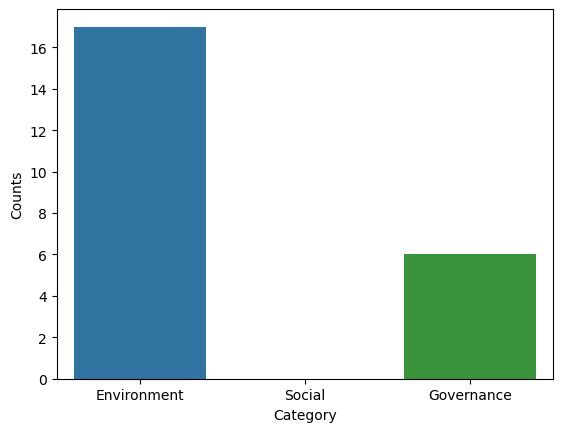

In [260]:
sns.barplot(data=cat_counts_df, x='Category', y='Counts')

<AxesSubplot:xlabel='Category', ylabel='Scores Sum'>

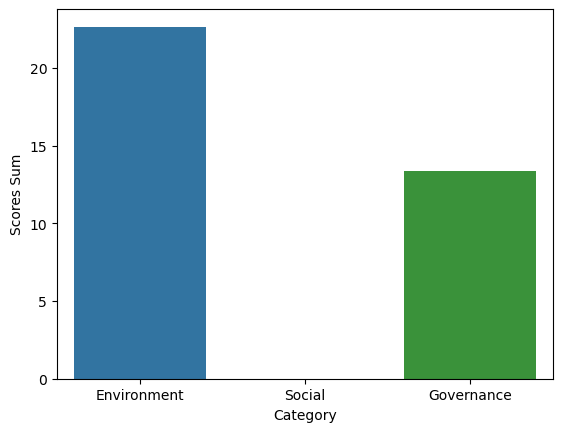

In [261]:
sns.barplot(data=cat_scores_df, x='Category', y='Scores Sum')

<AxesSubplot:xlabel='Counts', ylabel='Category'>

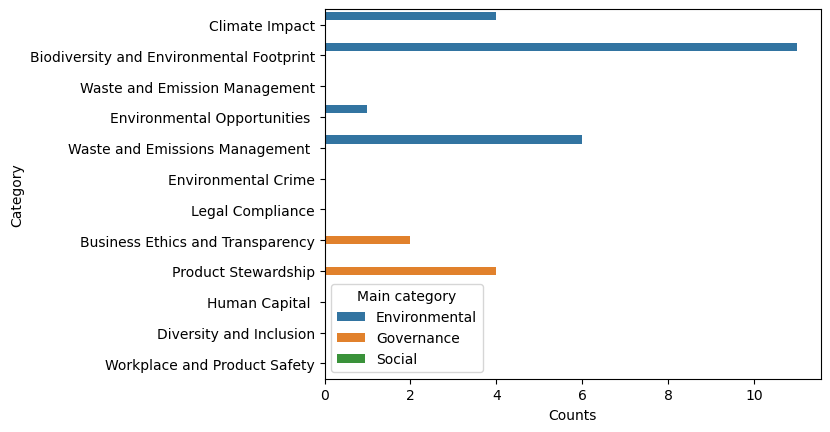

In [262]:
sns.barplot(data=subcat_counts_df, x='Counts', y='Category', orient='h', hue = 'Main category')

<AxesSubplot:xlabel='Scores Sum', ylabel='Category'>

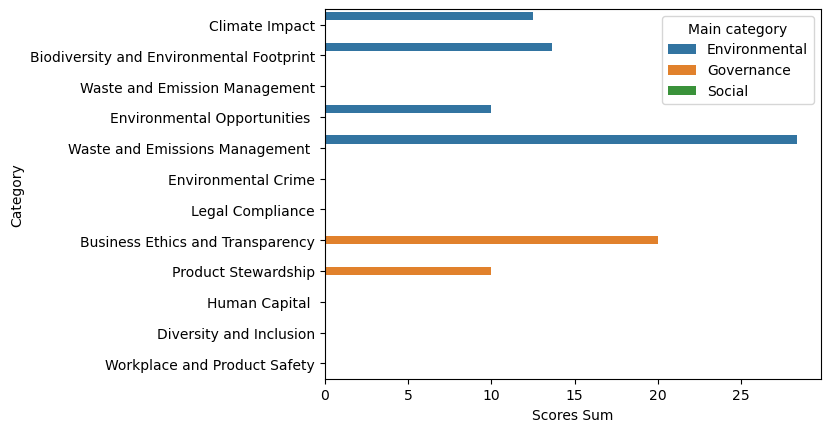

In [284]:
sns.barplot(data=subcat_scores_df, x='Scores Sum', y='Category', orient='h', hue = 'Main category')

In [ ]:
subcat_scores_df = subcat_scores_df.reset_index()

<AxesSubplot:xlabel='Scores Sum', ylabel='Category'>

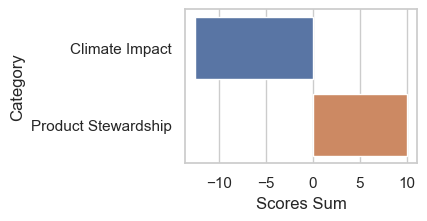

In [357]:
# choose two main categories
subcategory_1 = 'Climate Impact'
subcategory_2 = 'Product Stewardship'
subcategory_1_score = dict()
subcategory_2_score = dict()

# convert one of them to negative
subcategory_1_score[subcategory_1] = subcat_scores_df[subcat_scores_df['Category']==subcategory_1]['Scores Sum'].values[0]*-1
subcategory_2_score[subcategory_2] = subcat_scores_df[subcat_scores_df['Category']==subcategory_2]['Scores Sum'].values[0]

subcategory_1_score.update(subcategory_2_score)
# make df
df_subcategories_1_2 = pd.DataFrame({'Category': list(subcategory_1_score.keys()), 'Scores Sum': list(subcategory_1_score.values())})

# plot
sns.set_theme(style="whitegrid")
fig, ax = pyplot.subplots(figsize=(3,2))
sns.barplot(data=df_subcategories_1_2, x='Scores Sum', y='Category', orient='h')


#make pretty later

[Text(0.5, 1.0, 'Sum of Environmental subcategories per post of company')]

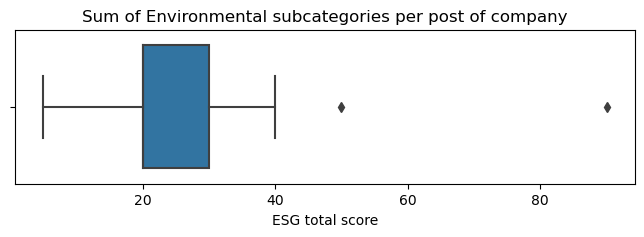

In [264]:
fig, ax = pyplot.subplots(figsize=(8,2))
sns.boxplot(data=data, x='ESG total score').set(title='Sum of Environmental subcategories per post of company')

[Text(0.5, 1.0, 'Sum of ESG main category per post of company')]

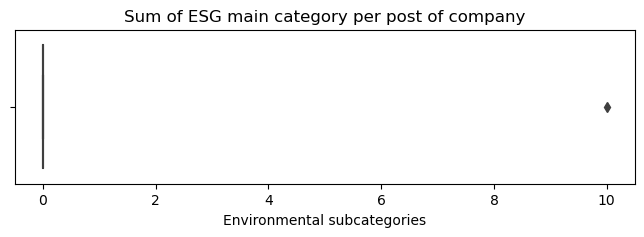

In [265]:
fig, ax = pyplot.subplots(figsize=(8,2))
sns.boxplot(data=data, x='Environmental subcategories').set(title='Sum of ESG main category per post of company')

[Text(0.5, 1.0, 'Sum of Environmental subcategories per post of company')]

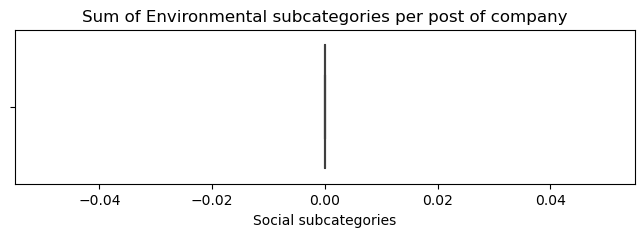

In [266]:
fig, ax = pyplot.subplots(figsize=(8,2))
sns.boxplot(data=data, x='Social subcategories').set(title='Sum of Environmental subcategories per post of company')

[Text(0.5, 1.0, 'Sum of Governance subcategories per post of company')]

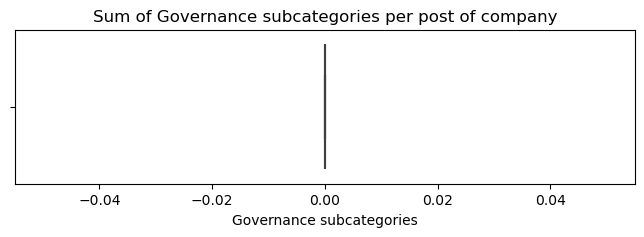

In [267]:
fig, ax = pyplot.subplots(figsize=(8,2))
sns.boxplot(data=data, x='Governance subcategories').set(title='Sum of Governance subcategories per post of company')

# Top 5 Analysis

In [276]:
#show column names
data.columns

Index(['index', 'Unnamed: 0', 'urn', 'ts', 'company', 'numLikes',
       'numComments', 'text', 'Environment', 'Positive', 'Climate Impact',
       'Biodiversity and Environmental Footprint', 'Negative',
       'Waste and Emissions Management ', 'Social', 'Human Capital ',
       'Environmental Opportunities ', 'Waste and Emission Management',
       'Diversity and Inclusion', 'Workplace and Product Safety',
       'Environmental Crime', 'Governance', 'Legal Compliance',
       'Business Ethics and Transparency', 'Product Stewardship',
       'Environmental subcategories', 'Social subcategories',
       'Governance subcategories', 'ESG total score'],
      dtype='object')

In [277]:
sort_by = input("Top 5 categorized by: ")

Top 5 categorized by:  ESG total score


In [278]:
sorted_by = data.sort_values(sort_by,ascending=True).iloc[0:5,:]
sorted_by = sorted_by.reset_index()

In [279]:
#show text, likes, etc
hashtags = []
for i in range(len(sorted_by)):
    print('Text for post number {} is: {}'.format(i+1,sorted_by.loc[i,'text']))
    print('\n')
    print('It has {} likes and {} comments'.format(sorted_by.loc[i,'numLikes'],sorted_by.loc[i,'numComments']))
    print('\n')
    
    hashtags.append(extract_hashtags(sorted_by.loc[i,'text']))
print("All hashtags: {}.".format(hashtags))

Text for post number 1 is: We’re proud to have won the Market Trailblazer category at The Climate Group RE100 Leadership Awards for our transition to renewable electricity. 

Renewable energy is a win–win for business and the planet. That’s why we’re partnering with others to accelerate the clean energy transition and make progress on our goal of 100% renewable energy for electricity and heat worldwide by 2030.    

🔗 Read more about our work here: https://lnkd.in/g3sTg3tv

#ClimateWeekNYC #RE100Awards 


It has 463 likes and 67 comments


Text for post number 2 is: We’re nearing the end of our logo journey with one more part remaining! 

Each symbol in our U expresses a fundamental aspect of our company and what we are doing to make positive change in the world.

Heart: A symbol of love, care and health. It represents our commitment to helping people take small everyday actions to improve their health and wellbeing.

Transformation: A symbol of positive change or transformation. Our c

**I have to fix this. These plots say nothing yet**

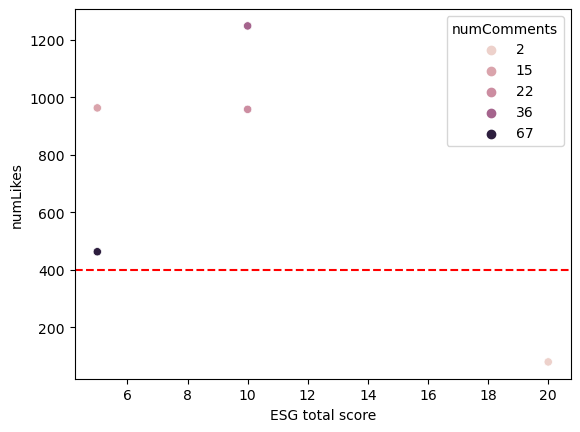

In [280]:
graph =sns.scatterplot(data=sorted_by,x='ESG total score', y = 'numLikes', hue='numComments')
graph.axhline(avg_likes,color='r', linestyle='--')

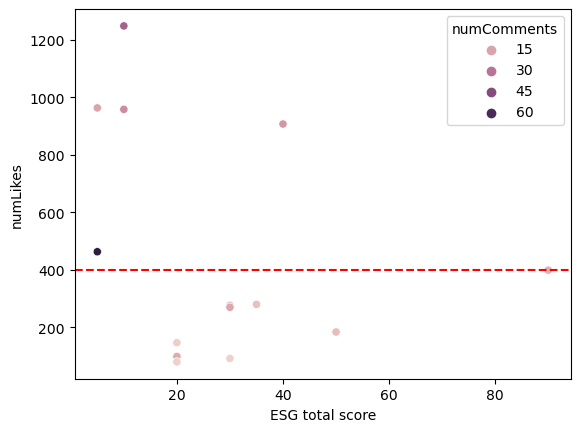

In [281]:
#maybe interesting for some companies with lots of posts

graph =sns.scatterplot(data=data,x='ESG total score', y = 'numLikes', hue='numComments')
graph.axhline(avg_likes,color='r', linestyle='--')

# Overall comment analysis

In [11]:
# get data
data_wcomm = pd.read_csv('../Data/posts2_clean.csv')
print(len(data_wcomm))
data_wcomm.head()

7390


Unnamed: 0                  urn                   ts  company  numLikes  \
0           0  6989253218673311744  2022-10-21 15:57:01  walmart        99   
1           1  6988946964394520576  2022-10-20 19:40:04  walmart        66   
2           2  6988865637318098944  2022-10-20 14:16:54  walmart       143   
3           3  6988537514160517120  2022-10-19 16:33:04  walmart       141   
4           4  6988484975855620096  2022-10-19 13:04:18  walmart       497   

   numComments                                               text  
0            1  #ICYMI: a new kind of Fulfillment Center is ch...  
1            3  Hellen's passion for patients and pharmacy beg...  
2            7  We believe that transparency and measurement a...  
3            5  We've teamed up with Ørsted and Schneider Elec...  
4            5  Back by customer demand: Black Friday Deals fo...

In [ ]:
#run once we have the comments with sentiment

final_df_sentiment = data_wcomm.loc[data_wcomm['company'] == option].copy()

#merge with dataframe we have been using before 
final_df = data.merge(final_df_sentiment, how='outter', on='urn')
final_df = final_df.drop_duplicates()

#top 5 based on ESG total score and  highest total sentiment
final_df_top_ESG = final_df.sort_values('ESG total score',ascending=False)[0:4]

#incorporate these two in the dataframe
sum_sentiment_per_post = final_df.groupby('urn')['Sentiment'].sum()
mean_sentiment_per_post = final_df.groupby('urn')['Sentiment'].mean()

#sentiment total score same to sum_sentiment_per_post
final_df_top_sentiment = final_df.sort_values('sentiment total score',ascending=False)[0:4]

## Scatterplots

In [275]:
# print posts with post numbers


In [ ]:
#this is the idea, need to look at the data first

sns.scatterplot(data=final_df_top_ESG,x='ESG total score', y='Sentiment mean', hue='Post number')


In [ ]:
#this is the idea, need to look at the data first

sns.scatterplot(data=final_df_top_sentiment,x='ESG total score', y='Sentiment mean', hue='Post number')

## Distribution

In [ ]:
#distribution of comments for top 5 highest ESG total score

fig, ax = pyplot.subplots(figsize=(8,2))
sns.boxplot(data=final_df_top_ESG, x='Sentiment',hue='Post number').set(title='distribution of comments for top 5 posts with the highest ESG total score')

In [ ]:
#distribution of comments for top 5 highest Environmental score 


In [ ]:
#distribution of comments for top 5 highest Social score


In [ ]:
#distribution of comments for top 5 highest Governance score


In [ ]:
#distribution of comments for all posts
sns.boxplot(data=final_df, x='Sentiment',hue='Post number').set(title='distribution of comments for all posts by a company')

## Highest sentiment

In [ ]:
# print posts with post numbers (and ESG total score) + comments (sum)

In [ ]:
#barplot of comments with highest sentiment negative 
sns.barplot(data=final_df_top_sentiment, x='Post number', y='sentiment_total_negative_score')

In [ ]:
#barplot of comments with highest sentiment positive
sns.barplot(data=final_df_top_sentiment, x='Post number', y='sentiment_total_positive_score')